In [1]:
%load_ext autoreload
%autoreload 2
import os
import torch as t
from utils.config import opt
from model import FasterRCNNVGG16
from trainer import FasterRCNNTrainer
from data.util import  read_image
from utils.vis_tool import vis_bbox
from utils import array_tool as at
import cv2
import numpy
from numpy  import array
from labels import *  
%matplotlib inline

In [2]:
faster_rcnn = FasterRCNNVGG16()
trainer = FasterRCNNTrainer(faster_rcnn).cuda()

In [3]:
trainer.load('/home/mahaviratcingularity/vehicle_detector.pth')
opt.caffe_pretrain=True # this model was trained from caffe-pretrained model

1
test
found a vehicle!
bus


True

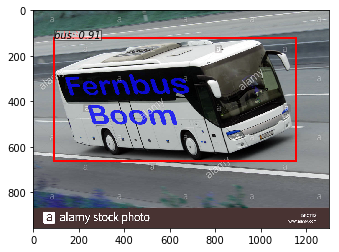

In [9]:
list=['bike','bus','car','motorbike']

#input the image you want to process:
image_np = cv2.imread('4.jpg')

image_cv=image_np
image_np = image_np.transpose((2, 0, 1))
img = t.from_numpy(image_np)[None]
_bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)

X = numpy.array(_labels)
Y = numpy.array(_bboxes)
Y=Y.astype(int)        

i=0
j=0

x1=[]        
y1=[]        
x2=[]        
y2=[]

for j in range (X.shape[1]):
    x1=(Y[0][i][1])
    y1=(Y[0][i][0])
    x2=(Y[0][i][3])
    y2=(Y[0][i][2])

q=0
print (X.shape[1])

for q in range (X.shape[1]):
    print("test")
    if LABEL_NAMES[X[0,i]] in list:
        print ('found a vehicle!')
        print (LABEL_NAMES[X[0,i]])
        cv2.rectangle(image_cv,(x1,y1),(x2,y2),(0,255,0),2)
        cv2.putText(image_cv,LABEL_NAMES[X[0,i]],(x1,y1),cv2.FONT_HERSHEY_SIMPLEX,2,(255,0,0))
        vis_bbox(at.tonumpy(img[0]),
         at.tonumpy(_bboxes[0]),
         at.tonumpy(_labels[0]).reshape(-1),
         at.tonumpy(_scores[0]).reshape(-1))
cv2.imwrite('image.jpg',image_cv)
#cv2.imshow("Show",image_cv)